In [1]:
import numpy as np
import pandas as pd
from edempy import Deck
from extrapolation import extrapolation
from LaceyClass import LaceyMixingAnalyzer
import matplotlib.pyplot as plt
from rnn.data_loader_rnn import RNNLoader
from rnn.rnn_extrap import plot_particles, import_dict
import matplotlib.pyplot as plt
import math


sim_names = ["Rot_drum_mono", "Rot_drum_binary_mixed", "Rot_drum_400k"]
sim_name = sim_names[-1]
sim_path =rf"V:\GrNN_EDEM-Sims\{sim_name}.dem"

In [31]:
daor_settings = f"{sim_path[:-4]}_data\Export_Data\Dynamic_angle_of_repose_analyst_settings.txt"

with open(daor_settings, 'r') as file:
    preferences=file.readlines()
    sim_end=float(preferences[3])
    domain=np.array(preferences[5].split(','))
    domain=domain.astype('float64')
    bin_size=np.array(preferences[7].split(','))
    bin_size=bin_size.astype('float64')
    interval=np.array(preferences[9].split(','))
    interval=interval.astype('float64')
    report=str(preferences[11])
    summary=str(preferences[13])
    plots=str(preferences[15])
    file.close()
    settings=True

grid_x=np.linspace(domain[0],domain[1],int((domain[1]-domain[0])/bin_size[0]))
grid_y=np.linspace(domain[2],domain[3],int((domain[3]-domain[2])/bin_size[1]))

In [12]:
start_t = 1
end_t = 20
domain_x = (-0.07, 0.07)       
domain_y = (-0.025, 0.025)
domain_z = (-0.07, 0.03)
num_bins = 10
direction = "y"

extrap = extrapolation(start_t, end_t, sim_path, domain_x, domain_y, domain_z, num_bins, direction)

In [64]:
delta_t = 0.05
extrapolated_time = []
delta_means = []
delta_stds = []
delta_covs = []
id_dict_path = rf"V:\GrNN_EDEM-Sims\{sim_name}_data\Export_Data"
id_dict = import_dict(id_dict_path, "id_dict")
plots_path = rf"{sim_path[:-4]}_data\Export_Data\extrap_algo_plots"

# for timestep in np.arange(rnn.start_t, rnn.end_t+delta_t, delta_t):
#     timestep_i = rnn.find_nearest(timestep, rnn.deck.timestepValues)
#     print(timestep_i)

#     delta=np.zeros(len(grid_y))
#     index_nonzero=np.zeros(len(grid_x))
#     SurfaceZ=np.zeros(shape=(len(grid_y),len(grid_x)))
#     SurfaceY=np.zeros(shape=(len(grid_y),len(grid_x)))
#     SurfaceX=np.zeros(shape=(len(grid_y),len(grid_x)))
#     Coord=extrap.get_particle_coords(timestep_i)[:,:3]

#     for i in range(len(grid_y)):
#     #Find surface particles
#         for j in range (len(grid_x)):
#             index_coord=np.where((Coord[:,0]>(grid_x[j]-bin_size[0]/2)) & (Coord[:,0]<(grid_x[j]+bin_size[0]/2)) & (Coord[:,1]>(grid_y[i]-bin_size[1]/2)) & (Coord[:,1]<(grid_y[i]+bin_size[1]/2)))
#             surf=Coord[index_coord]
#             #Index zero values and get surface particles
#             if surf.shape[0]>0:
#                 Max=np.argmax(surf[:,2])
#                 SurfaceX[i][j]=surf[Max,0]
#                 SurfaceY[i][j]=surf[Max,1]
#                 SurfaceZ[i][j]=surf[Max,2]
#                 index_nonzero[j]=j
#             else:
#                 index_nonzero[j]=-1
#         #Linear fit to surface particles
#         fit=np.polyfit(grid_x[index_nonzero!=-1],SurfaceZ[i][index_nonzero!=-1],1)
#         #Calculating angle of repose and statistics
#         delta[i]=math.atan(abs(fit[0]))*180/math.pi

    
#     delta_mean = np.average(delta)
#     delta_std = np.std(delta)
#     delta_cov = delta_std/delta_mean*100

#     delta_means.append(delta_mean)
#     delta_stds.append(delta_std)
#     delta_covs.append(delta_cov)

(24.7, 25.3)

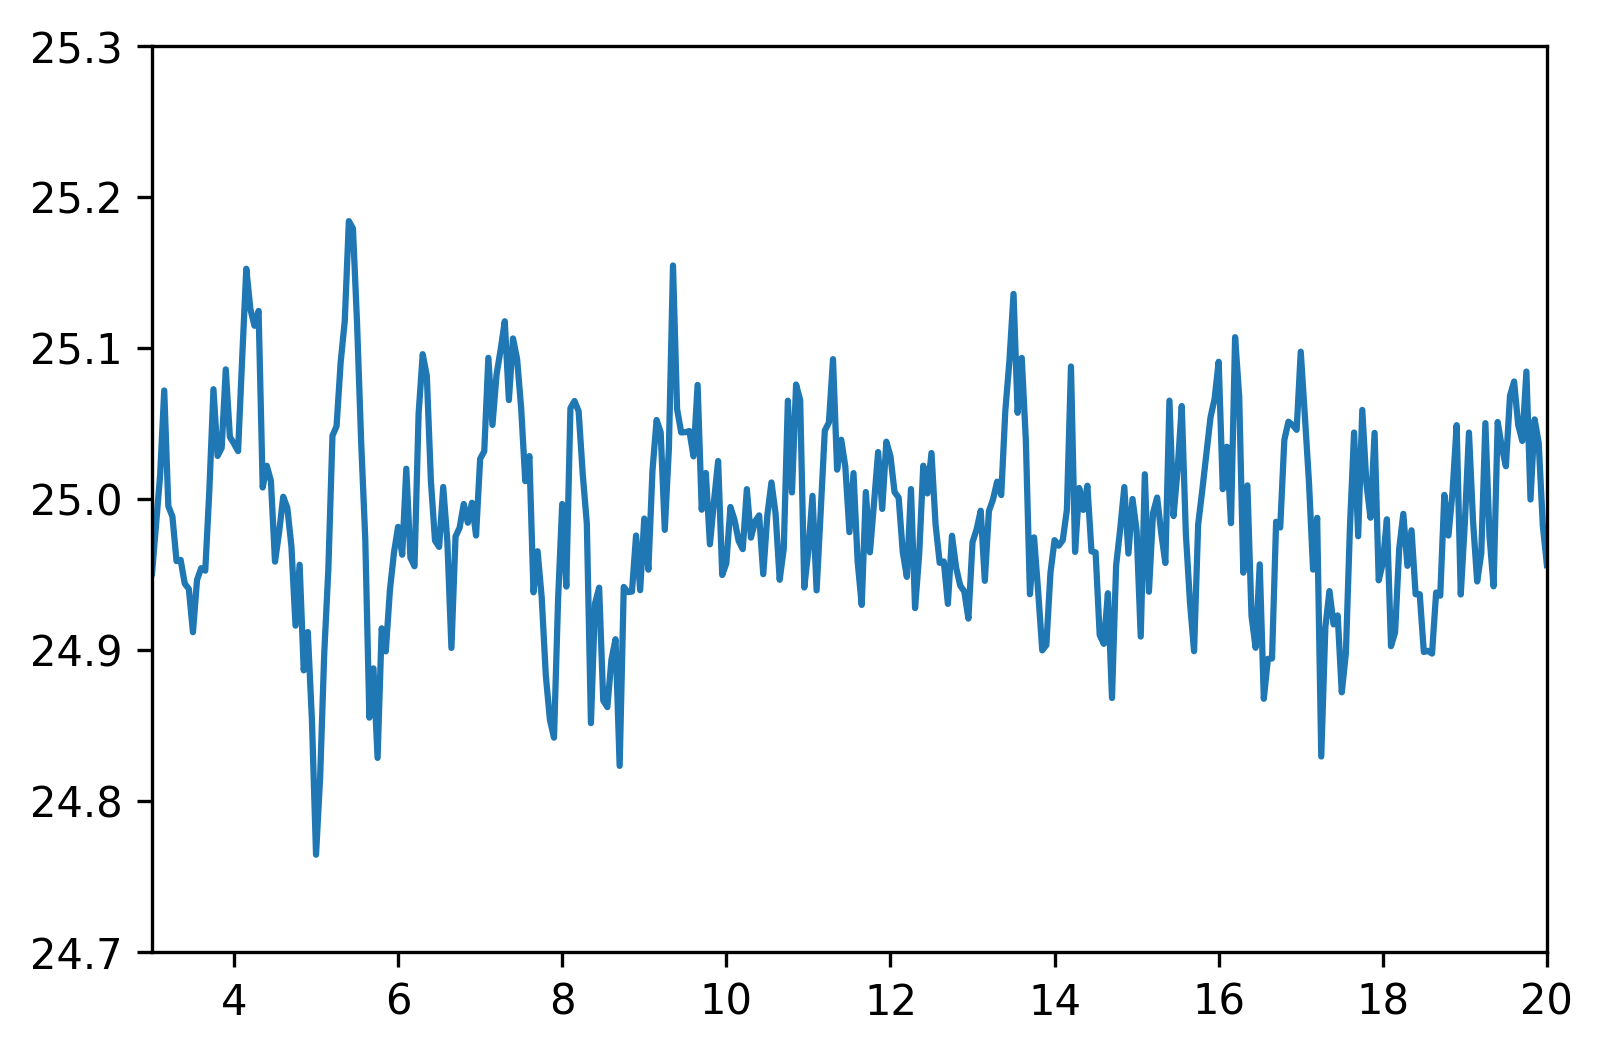

In [63]:
dem_daor_path = rf"V:\GrNN_EDEM-Sims\{sim_name}_data\Export_Data\dem_sim_plots\actual_DAoR.csv"
dem_daor = np.genfromtxt(dem_daor_path, delimiter=",")

plt.figure(dpi=300)
plt.plot(dem_daor[:,0], dem_daor[:,1])
plt.xlim(left=3, right=20)
plt.ylim(bottom=24.7, top=25.3)